<a href="https://colab.research.google.com/github/juliaronquetti/Modelo_predicao_SP/blob/main/2_imoveis_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation and cleaning



In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = 'https://github.com/juliaronquetti/Modelo_predicao_SP/'

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
from IPython.display import display, Latex, HTML
import warnings

def gera_df_stats_latex(df_stats, titulo):

  warnings.filterwarnings('ignore')
  # latex_table = df_stats.style.to_latex(hrules=True)
  latex_table = df_stats.to_latex(index=None)
  # display(Latex(latex_table))

  latex_table = latex_table.replace('tabular','array')
  latex_table = latex_table.replace('toprule','hline')
  latex_table = latex_table.replace('midrule','hline')
  latex_table = latex_table.replace('bottomrule','hline')

  latex_table = '\\textbf{' + titulo + '} \\\\' + latex_table

  warnings.filterwarnings('default')
  return latex_table

# Data

In [ ]:
df = pd.read_csv(path + 'imoveis_raw.csv')
df.head()

,title,price,oldprice,location,date,destaque,categoria,tipo,condominio,area_util,quartos,banheiros,vagas_na_garagem,detalhes_do_imovel,detalhes_do_condominio,iptu,zona,academia,elevador,permitido_animais,piscina,portaria,salao_de_festas,condominio_fechado,seguranca_24h,portao_eletronico,area_murada,area_de_servico,armarios_na_cozinha,armarios_no_quarto,churrasqueira,mobiliado,quarto_de_servico,ar_condicionado,porteiro_24h,varanda,bairro,img_index
0,Apartamento Reserva Raposo,299000,NaN,"São Paulo, Jardim Boa Vista (Zona Oeste)",25/04/2024,True,Apartamentos,Padrão,450.0,47,2,1,1,"Área de serviço, Armários na cozinha","Academia, Elevador, Permitido animais, Piscina...",NaN,OESTE,0,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,Jardim Boa Vista,0
1,Apartamento MOBILIADO com ÓTIMA Localização Ág...,350000,NaN,"São Paulo, Água Branca",25/04/2024,True,Apartamentos,Padrão,380.0,43,2,1,0,"Academia, Área de serviço, Armários na cozinha...","Academia, Condomínio fechado, Elevador, Permit...",0.0,OESTE,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0,0,0,0,Água Branca,1
2,"Apartamento 115.000,00",115000,NaN,"São Paulo, Parque Nações Unidas",24/04/2024,True,Apartamentos,Padrão,150.0,50,2,1,1,"Área de serviço, Armários na cozinha",Condomínio fechado,0.0,OESTE,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,Parque Nações Unidas,2
3,"Apartamento 3 dorm + 1 HomeOffice, Pirituba, c...",240000,280000.0,"São Paulo, Vila Guedes",24/04/2024,True,Apartamentos,Padrão,400.0,50,3,1,1,"Área de serviço, Armários na cozinha, Armários...","Condomínio fechado, Permitido animais, Piscina...",NaN,OESTE,0,0,1,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,0,Vila Guedes,3
4,Casa de condomínio sobrado para venda com 97 m...,570000,NaN,"São Paulo, Jardim Sarah",25/04/2024,False,Casas,Casa de condomínio,320.0,97,3,3,2,"Ar condicionado, Área de serviço, Armários na ...","Condomínio fechado, Permitido animais, Piscina...",19.0,OESTE,0,0,1,1,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,Jardim Sarah,4


In [ ]:
before = len(df)
print('Before, number of records: ', before)


Before, number of records:  23433


# Dados ausentes

In [ ]:
df.isnull().sum()[ df.isnull().sum()>0 ] / len(df)

,0
oldprice,0.962019
condominio,0.007127
banheiros,0.000256
detalhes_do_imovel,0.304485
detalhes_do_condominio,0.303333
iptu,0.008578


In [ ]:
df.dropna(subset=['condominio','iptu','banheiros'],inplace=True)
df.drop(['oldprice'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

df.isnull().sum()[ df.isnull().sum()>0 ] / len(df)

,0
detalhes_do_imovel,0.304145
detalhes_do_condominio,0.301687


# Tipos e conversões

In [ ]:
df['quartos'] = np.where(df['quartos'] == '5 ou mais', 5, df['quartos'])
df['quartos'] = df['quartos'].astype('int32')

df['banheiros'] = np.where(df['banheiros'] == '5 ou mais', 5, df['banheiros'])
df['banheiros'] = df['banheiros'].astype(int)

df['vagas_na_garagem'] = np.where(df['vagas_na_garagem'] == '5 ou mais', 5, df['vagas_na_garagem'])
df['vagas_na_garagem'] = df['vagas_na_garagem'].astype(int)

In [ ]:
campos_numericos = df.select_dtypes(include=['number']).columns
campos_numericos

Index(['price', 'condominio', 'area_util', 'quartos', 'banheiros',
       'vagas_na_garagem', 'iptu', 'academia', 'elevador', 'permitido_animais',
       'piscina', 'portaria', 'salao_de_festas', 'condominio_fechado',
       'seguranca_24h', 'portao_eletronico', 'area_murada', 'area_de_servico',
       'armarios_na_cozinha', 'armarios_no_quarto', 'churrasqueira',
       'mobiliado', 'quarto_de_servico', 'ar_condicionado', 'porteiro_24h',
       'varanda', 'img_index'],
      dtype='object')

In [ ]:
df[campos_numericos] = df[campos_numericos].astype(int)

# Outliers

In [ ]:
def detect_outliers_iqr(data):
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  outliers = []
  for index, row in pd.DataFrame(data).iterrows():
    if row.values < lower_bound or row.values > upper_bound:
      outliers.append(index)

  # outliers = [i for i, x in enumerate(data) if (x < lower_bound or x > upper_bound)] # much more eficient, but not garantee return indexes
  return outliers

atributos_com_outliers = {}
records_com_outliers = {}

for atributo in campos_numericos:
  if df[atributo].max() > 5: # excluí variáveis binárias ou de quantidades discretas como número de dormitórios e garagens
    outliers = detect_outliers_iqr(df[atributo])
    if len(outliers) > 0:
      atributos_com_outliers[atributo] = len(outliers)
      records_com_outliers[atributo] = outliers

print("Atributos com outliers: ", atributos_com_outliers)


Atributos com outliers:  {'price': 1476, 'condominio': 1134, 'area_util': 1213, 'iptu': 2553}


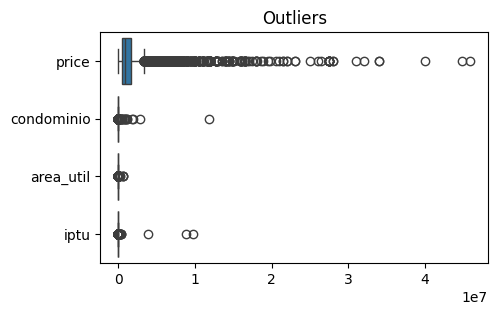

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df[atributos_com_outliers.keys()],orient='h')
plt.title('Outliers')
plt.show()


In [ ]:
df[atributos_com_outliers.keys()].describe()

,price,condominio,area_util,iptu
count,2.318300e+04,2.318300e+04,23183.000000,2.318300e+04
mean,1.390773e+06,2.316329e+03,241.291377,1.791364e+03
std,1.775588e+06,8.355912e+04,7246.571800,9.061262e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,5.290000e+05,1.000000e+00,65.000000,1.000000e+00
50%,9.330000e+05,7.530000e+02,108.000000,1.770000e+02
75%,1.650000e+06,1.500000e+03,170.000000,5.700000e+02
max,4.590000e+07,1.180000e+07,608608.000000,9.751020e+06


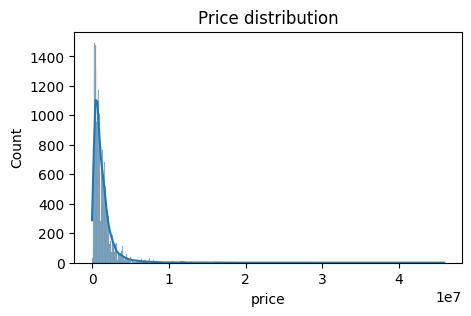

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(data=df['price'],kde=True)
plt.title('Price distribution')
plt.show()


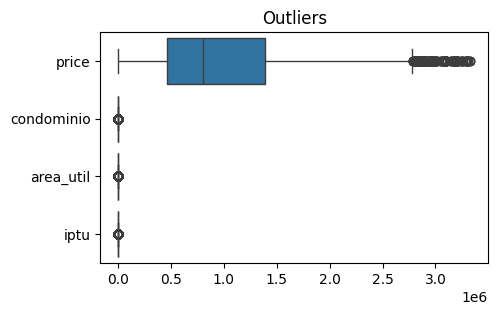

,price,condominio,area_util,iptu
count,1.929900e+04,19299.000000,19299.000000,19299.000000
mean,9.953415e+05,844.543085,106.997046,242.379502
std,6.648031e+05,813.293199,61.201124,308.229327
min,1.000000e+00,0.000000,0.000000,0.000000
25%,4.650000e+05,40.000000,60.000000,0.000000
50%,8.000000e+05,687.000000,94.000000,113.000000
75%,1.389900e+06,1300.000000,141.000000,374.000000
max,3.330003e+06,3748.000000,327.000000,1420.000000


In [ ]:
indices_to_remove = []
for atributo, outlier_indices in records_com_outliers.items():
  indices_to_remove = indices_to_remove + records_com_outliers[atributo]

df = df.drop(list(set(indices_to_remove)))
df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(5,3))
sns.boxplot(data=df[atributos_com_outliers.keys()],orient='h')
plt.title('Outliers')
plt.show()

df[atributos_com_outliers.keys()].describe()

# Dados inconsistentes

In [ ]:
preco_medio = df['price'].sum() / df['area_util'].sum()

print('Imóveis com preço do m2 10x menor que o preço médio = ', len( df[ (df['price'] / df['area_util'] < 0.10*preco_medio) ] ))
print('Imóveis com preço menor que R$ 50.000 = ', len( df[ (df['price'] < 50000) ] ))
print('Imóveis com menos de 18 m2 = ', len( df[ (df['area_util'] < 20) ] ))

print(len(df[ (df['price'] / df['area_util'] < 0.10*preco_medio) | (df['price'] < 50000) | (df['area_util'] < 20) ]))

Imóveis com preço do m2 10x menor que o preço médio =  20
Imóveis com preço menor que R$ 50.000 =  20
Imóveis com menos de 18 m2 =  128
148


In [ ]:
df = df[ (df['price'] / df['area_util'] >= 0.10*preco_medio) & (df['price'] >= 50000) & (df['area_util'] >= 20) ]

# Price distribution

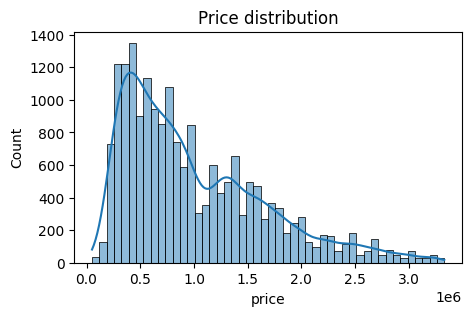

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(data=df['price'],kde=True)
plt.title('Price distribution')
plt.show()

In [ ]:
df.describe()

,price,condominio,area_util,quartos,banheiros,vagas_na_garagem,iptu,academia,elevador,permitido_animais,piscina,portaria,salao_de_festas,condominio_fechado,seguranca_24h,portao_eletronico,area_murada,area_de_servico,armarios_na_cozinha,armarios_no_quarto,churrasqueira,mobiliado,quarto_de_servico,ar_condicionado,porteiro_24h,varanda,img_index
count,1.915100e+04,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000
mean,1.001118e+06,850.633126,107.654274,2.473918,2.244008,1.538666,244.176388,0.217482,0.224845,0.355021,0.338886,0.056498,0.404365,0.102658,0.067673,0.008929,0.000731,0.333873,0.075087,0.022140,0.341914,0.087567,0.003394,0.105373,0.001044,0.201452,11584.918385
std,6.637869e+05,813.371174,60.893165,0.845097,1.166655,1.063447,308.725808,0.412544,0.417491,0.478532,0.473343,0.230888,0.490782,0.303519,0.251190,0.094073,0.027028,0.471607,0.263539,0.147142,0.474363,0.282672,0.058161,0.307042,0.032300,0.401095,6778.337024
min,5.100000e+04,0.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.742580e+05,89.500000,60.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5675.500000
50%,8.000000e+05,700.000000,95.000000,3.000000,2.000000,1.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11509.000000
75%,1.390000e+06,1300.000000,142.000000,3.000000,3.000000,2.000000,375.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17450.500000
max,3.330003e+06,3748.000000,327.000000,5.000000,5.000000,5.000000,1420.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23432.000000


In [ ]:
# just check
len(df[ df['price'] <= 0 ]), len(df[ df['area_util'] <= 0 ]), len(df[ df['condominio'] < 0 ]), len(df[ df['iptu'] < 0])

(0, 0, 0, 0)

In [ ]:
after = len(df)

print(f'% of records cleaning: {((before - after)/before * 100):.2f}%')
print('After cleaning, number of records: ', after)

% of records cleaning: 18.27%
After cleaning, number of records:  19151


In [ ]:
df.columns

Index(['title', 'price', 'location', 'date', 'destaque', 'categoria', 'tipo',
       'condominio', 'area_util', 'quartos', 'banheiros', 'vagas_na_garagem',
       'detalhes_do_imovel', 'detalhes_do_condominio', 'iptu', 'zona',
       'academia', 'elevador', 'permitido_animais', 'piscina', 'portaria',
       'salao_de_festas', 'condominio_fechado', 'seguranca_24h',
       'portao_eletronico', 'area_murada', 'area_de_servico',
       'armarios_na_cozinha', 'armarios_no_quarto', 'churrasqueira',
       'mobiliado', 'quarto_de_servico', 'ar_condicionado', 'porteiro_24h',
       'varanda', 'bairro', 'img_index'],
      dtype='object')

In [ ]:
df.isnull().sum()[ df.isnull().sum()>0 ] / len(df)

,0
detalhes_do_imovel,0.309018
detalhes_do_condominio,0.306250


In [ ]:
df.to_csv('imoveis_clean.csv', index=False)

In [ ]:
df_quartos_grouped = df.groupby('quartos').agg({'price': ['mean', 'count'], 'area_util': 'mean'}).reset_index()
df_quartos_grouped.columns = ['Nr quartos', 'Preco Medio', 'Quantidade Imoveis', 'Area Media']
df_quartos_grouped['Preco Medio'] = (df_quartos_grouped['Preco Medio']).astype(int)
df_quartos_grouped['Area Media'] = (df_quartos_grouped['Area Media']).astype(int)
# print(df_quartos_grouped)

In [ ]:
df_zona_grouped = df.groupby('zona').agg({'price': ['mean', 'count'], 'area_util': 'mean'}).reset_index()
df_zona_grouped.columns = ['Zona', 'Preco Medio', 'Quantidade Imoveis', 'Area Media']
df_zona_grouped['Preco Medio'] = (df_zona_grouped['Preco Medio']).astype(int)
df_zona_grouped['Area Media'] = (df_zona_grouped['Area Media']).astype(int)
# print(df_zona_grouped)

In [ ]:
latex_table = gera_df_stats_latex(df_quartos_grouped,'Clean Data - Qqe Dorm')
display(Latex(latex_table))

<IPython.core.display.Latex object>

In [ ]:
latex_table = gera_df_stats_latex(df_zona_grouped,'Clean Data - por Zonas')
display(Latex(latex_table))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Latex object>

In [ ]:
np.random.seed(42)
selected_columns = ['price', 'location', 'condominio', 'area_util', 'quartos', 'banheiros', 'vagas_na_garagem', 'iptu', 'academia', 'zona']
temp = df.iloc[np.random.choice(df.index, size=5, replace=False)][selected_columns]
temp.columns = [col.replace('_', '-') for col in temp.columns]
temp['...'] = '...'
latex_table = gera_df_stats_latex(temp,'Clean Data - Sample')
display(Latex(latex_table))

print()
pd.options.display.float_format = '{:.0f}'.format
temp = df.describe(include='all').iloc[[1,2,3,4,5,6,10]][selected_columns]
temp.columns = [col.replace('_', '-') for col in temp.columns]
temp['...'] = '...'
latex_table = gera_df_stats_latex(temp,'Clean Data - Statistics')
display(Latex(latex_table))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
np.random.seed(42)
selected_columns = ['price', 'location', 'condominio', 'area_util', 'quartos', 'img_index']
temp = df.iloc[np.random.choice(df.index, size=5, replace=False)][selected_columns]
temp.columns = [col.replace('_', '-') for col in temp.columns]
temp['...'] = '...'

df_imagens_yolo = pd.read_csv(path + 'imoveis_yolo_features.csv')
df_imagens_yolo.rename(columns={'img_index':'img-index'}, inplace=True)
temp = pd.merge(temp, df_imagens_yolo, on='img-index', how='left')
temp = temp.drop(['img-index'], axis=1)
temp = temp[temp.columns[0:14]]
temp['... '] = '...'

latex_table = gera_df_stats_latex(temp,'Records with Yolo detected objects')
display(Latex(latex_table))


<IPython.core.display.Latex object>

# Encodes e exclusões de campos

In [ ]:
path = ''
df = pd.read_csv(path + 'imoveis_clean.csv')
df.head()

In [ ]:
df.describe(include='object')

In [ ]:
df.iloc[np.random.choice(df.index, size=10, replace=False)][['location','bairro']]

In [ ]:
# location e bairro, mesma informação, delete
df.drop(['bairro'], axis=1, inplace=True)

In [ ]:
df['date'].min(), df['date'].max()

In [ ]:
# não relevante, delete
df.drop(['date'], axis=1, inplace=True)

In [ ]:
df.destaque.value_counts() / len(df)

In [ ]:
# delete, < 0.01%
# df.drop(['destaque'], axis=1, inplace=True)
# decidimos manter
df.destaque = df.destaque.astype(int)

In [ ]:
df.iloc[np.random.choice(df.index, size=10, replace=False)][['tipo','categoria']]

In [ ]:
# vamos confirmar que esses campos são diferentes
df.iloc[np.random.choice(df.index, size=10, replace=False)][['detalhes_do_imovel' , 'detalhes_do_condominio']]

In [ ]:
def extract_terms(df,campo):
  """
  Extracts a list of unique terms from the 'campo' column,
  splitting by ',' and removing duplicates.
  """
  all_terms = []
  for details in df[campo].fillna(''):  # Handle potential NaNs
    terms = details.split(',')
    for term in terms:
      term = term.strip()
      if term:  # Ignore empty strings
        all_terms.append(term)

  unique_terms = list(set(all_terms))
  return unique_terms

unique_terms_detalhes_do_imovel = extract_terms(df,'detalhes_do_imovel')
print(len(unique_terms_detalhes_do_imovel), unique_terms_detalhes_do_imovel)

unique_terms_detalhes_do_condominio = extract_terms(df,'detalhes_do_condominio')
print(len(unique_terms_detalhes_do_condominio), unique_terms_detalhes_do_condominio)

In [ ]:
df.columns

In [ ]:
df.tipo.value_counts()

In [ ]:
df.categoria.value_counts()

In [ ]:
df.condominio_fechado.value_counts()

In [ ]:
set(unique_terms_detalhes_do_imovel) - set(unique_terms_detalhes_do_condominio)

In [ ]:
set(unique_terms_detalhes_do_imovel).intersection(set(unique_terms_detalhes_do_condominio))

In [ ]:
# maior parte das informações redundantes
df.drop(['detalhes_do_imovel'], axis=1, inplace=True)
df.drop(['detalhes_do_condominio'], axis=1, inplace=True)

In [ ]:
df.describe(include='object')

## Hot encode

In [ ]:
# Create a OneHotEncoder object with drop='first' to avoid multicollinearity
enc = OneHotEncoder(handle_unknown='ignore', drop='first')

# Fit and transform the 'location', 'categoria', 'tipo', and 'zona' columns
encoded_features = enc.fit_transform(df[['categoria', 'tipo', 'zona']])

# Convert the sparse matrix to a dense array
encoded_features = encoded_features.toarray()

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=enc.get_feature_names_out(['categoria', 'tipo', 'zona']))

# Concatenate the encoded features with the original DataFrame, dropping the original categorical columns
df = pd.concat([df.drop(['categoria', 'tipo', 'zona'], axis=1), encoded_df], axis=1)


In [ ]:
df.columns

## Label encode

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Cria um objeto LabelEncoder
le = LabelEncoder()

# Ajusta e transforma a coluna 'location'
df['location'] = le.fit_transform(df['location'])

In [ ]:
df.describe(include='object')

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()[ df.isnull().sum()>0 ] / len(df)

In [ ]:
# convert all numeric features to int
for column in df.columns:
  if df[column].dtype != object:
    df[column] = df[column].astype(int)

In [ ]:
df.to_csv('imoveis_clean_encoded.csv', index=False)

In [ ]:
import os
from google.colab import files

files.download('/content/' + 'imoveis_clean.csv')
files.download('/content/' + 'imoveis_clean_encoded.csv')